In [1]:
%pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
%pip install -q xformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Load data

In [2]:
import pandas as pd

df = pd.read_csv(r"D:\Code\AISIA\AERA02_AptitudeAssessment_Dataset_NLP.csv")

In [3]:
df.describe(include='all')

,score,title,review
count,1039356,1039332,813700
unique,37,533569,783763
top,5.0,The best place to relax,시설이 좀 오래 되어.. 금고랑 샤워기랑 문제가 좀 있었지만
freq,731333,43224,28417


# Remove NaN

In [4]:
empty_reviews_df = df[df['review'].isnull()]
empty_reviews_df.head(20)

,score,title,review
3000,5.0,Friendly and helpful team of staff,NaN
3001,5.0,Friendly and helpful team of staff,NaN
3002,5.0,Friendly and helpful team of staff,NaN
3003,5.0,Friendly and helpful team of staff,NaN
3004,5.0,Friendly and helpful team of staff,NaN
3005,5.0,Friendly and helpful team of staff,NaN
3006,5.0,Friendly and helpful team of staff,NaN
3007,5.0,Friendly and helpful team of staff,NaN
3008,5.0,Friendly and helpful team of staff,NaN
3009,5.0,Friendly and helpful team of staff,NaN


In [5]:
df_cleaned = df.dropna()
df_cleaned.describe(include='all')

,score,title,review
count,813676,813676,813676
unique,11,533437,783739
top,5.0,여행,시설이 좀 오래 되어.. 금고랑 샤워기랑 문제가 좀 있었지만
freq,546457,28600,28417


# Remove duplicate content

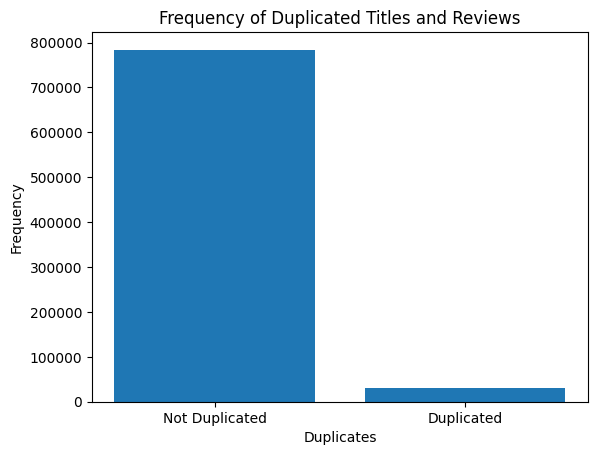

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of duplicates
duplicates_count = df_cleaned.duplicated(subset=['title', 'review']).value_counts()

# Plot the histogram
plt.bar(duplicates_count.index.astype(str), duplicates_count.values)
plt.title('Frequency of Duplicated Titles and Reviews')
plt.xlabel('Duplicates')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Duplicated', 'Duplicated'])
plt.show()

In [8]:
non_duplicated_df = df_cleaned.drop_duplicates(subset=['score', 'title', 'review'])
non_duplicated_df

,score,title,review
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good..."
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...
...,...,...,...
1203207,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...
1203208,5.0,Check this place,My friend and I received excellent and profess...
1203209,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...
1203210,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...


In [9]:
non_duplicated_df.describe(include='all')

,score,title,review
count,784031,784031,784031
unique,11,533437,783739
top,5.0,Great hotel,…
freq,545683,2215,13


In [10]:
row_with_ellipsis_review = non_duplicated_df[non_duplicated_df['review'] == '…']
row_with_ellipsis_review

,score,title,review
268588,3.0,さりげに社会主義のかおりが。。。,…
461960,4.0,オーシャンフロントがオススメ！だけど、蚊多い‥,…
582890,5.0,アンビン島でホームステイ,…
698238,5.0,日系ホテルらしいおもてなしが最高！,…
811541,4.0,バルコニーつきデラックスの部屋はイイ感じ！,…
847330,4.0,古いけど素敵、でも色々社会主義国家風,…
848894,4.0,朝のビュッフェでスモークサーモン食べ放題です。,…
1074312,4.0,安心して宿泊できるホテル。一人旅や女性にお勧め！！,…
1095453,5.0,ホーチミン１区に飽きたら,…
1191905,5.0,素晴らしい！このホテルを選んでラッキー♪,…


In [11]:
row_with_ellipsis_review = non_duplicated_df[non_duplicated_df['title'] == '…']
row_with_ellipsis_review

,score,title,review
362793,5.0,…,Tôi đi công tác và nghỉ lại tại Gold Coast Hot...
1156365,5.0,…,"Nhân viên tận tình, khá là nice. Phòng sạch sẽ..."


In [12]:
import pandas as pd

# Assuming 'non_duplicated_df' is your DataFrame containing the 'title' and 'review' columns

# Check if 'title' contains "..." only
contains_ellipsis_title = non_duplicated_df['title'].str.match('^(\.\.\.)+$')

# Check if 'review' contains "..." only
contains_ellipsis_review = non_duplicated_df['review'].str.match('^(\.\.\.)+$')

# Align the indices of the boolean series with the DataFrame
contains_ellipsis_title.index = non_duplicated_df.index
contains_ellipsis_review.index = non_duplicated_df.index

# Count the total number of rows where either 'title' or 'review' contains "..." only
total_rows_with_ellipsis = (contains_ellipsis_title | contains_ellipsis_review).sum()

print(f"Total number of rows containing '...' only in either 'title' or 'review': {total_rows_with_ellipsis}")

non_duplicated_df[contains_ellipsis_title | contains_ellipsis_review]

Total number of rows containing '...' only in either 'title' or 'review': 23


,score,title,review
62440,5.0,...,Great Hotel Great service in Hanoi! I loved th...
86917,5.0,...,"Giá tốt, nhân viên chu đáo nhiệt tình, địa điể..."
156573,5.0,...,Phòng đẹp rất sạch sẽ. Đồ ăn cũng khá hợp khẩu...
170557,2.0,...,I feel bad writing this but I think it’s fair ...
238003,5.0,...,"Chủ nhà xinh đẹp và thân thiện, phòng ngay vị ..."
314087,5.0,...,Không gian phía bên ngoài khach sạn khá cổ kín...
314122,5.0,...,1 địa điểm rất thích hợp cho cả các cặp đôi ha...
322580,5.0,...,"Tuan et Tony, francophones accomplis, vous acc..."
372422,5.0,......,"My first night arrival i do enjoy my dinner,ev..."
418323,4.0,...,This place is so nice for the price and not fa...


In [13]:
non_duplicated_df['title'] = non_duplicated_df.apply(lambda row: row['review'] if row['title'] == '...' else row['title'], axis=1)
non_duplicated_df['title'] = non_duplicated_df.apply(lambda row: row['review'] if contains_ellipsis_title[row.name] else row['title'], axis=1)

C:\Users\quynd\AppData\Local\Temp\ipykernel_8288\844446345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicated_df['title'] = non_duplicated_df.apply(lambda row: row['review'] if row['title'] == '...' else row['title'], axis=1)
C:\Users\quynd\AppData\Local\Temp\ipykernel_8288\844446345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_duplicated_df['title'] = non_duplicated_df.apply(lambda row: row['review'] if contains_ellipsis_title[row.name] else row['title'], axis=1)


## Clarify language of dataset.

In [14]:
!git clone https://huggingface.co/papluca/xlm-roberta-base-language-detection

fatal: destination path 'xlm-roberta-base-language-detection' already exists and is not an empty directory.


In [15]:
non_duplicated_df

,score,title,review
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good..."
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...
...,...,...,...
1203207,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...
1203208,5.0,Check this place,My friend and I received excellent and profess...
1203209,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...
1203210,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...


In [16]:
print(len(list(non_duplicated_df['review'])))

784031


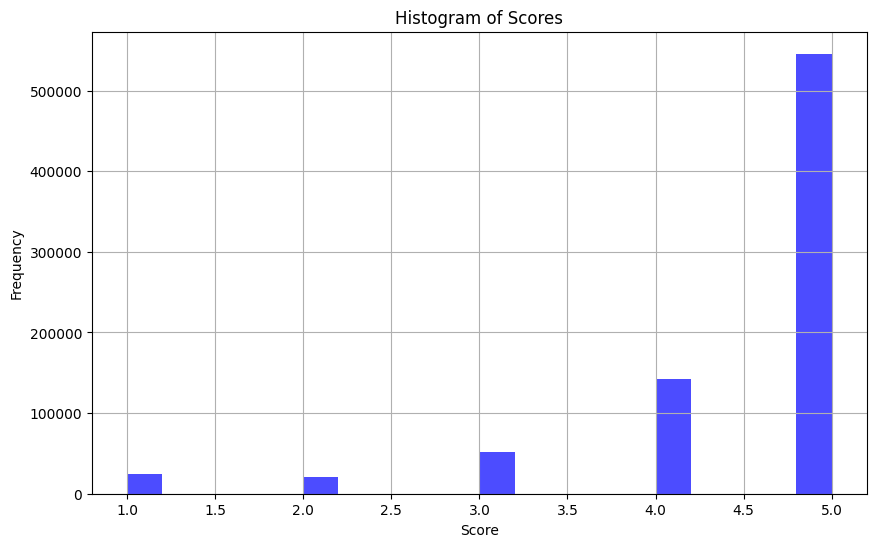

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'vi_df' is your DataFrame containing the 'score' column

# Convert 'score' column to numeric
non_duplicated_df.loc[:, 'score'] = pd.to_numeric(non_duplicated_df['score'], errors='coerce')

# Drop NaN values in the 'score' column
vi_df = non_duplicated_df.dropna(subset=['score'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_duplicated_df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Observation:**
- We will use title to classify languages of each rows.
- after classified all rows, we can move to use only Vietnamese langauges to visualize and find its insight.


In [ ]:
from transformers import pipeline
import torch 

model_ckpt = "papluca/xlm-roberta-base-language-detection"
device = 0 if torch.cuda.is_available() else -1
print("device:", device)

pipe = pipeline("text-classification", model=model_ckpt, device=device)
result = pipe(list(non_duplicated_df['review']), top_k=1, truncation=True)

# Extract labels from the result
labels = [entry[0]['label'] for entry in result]

# Create DataFrame with labels
result_df = pd.DataFrame(labels, columns=['language'])

In [20]:
non_duplicated_df.reset_index(drop=True, inplace=True)
result_df.reset_index(drop=True, inplace=True)

# Merge 'vi_df_sub_title' with 'result_df' on their index
merged_df = pd.concat([non_duplicated_df, result_df], axis=1)
merged_df

,score,title,review,language
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...,es
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
...,...,...,...,...
784026,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...,zh
784027,5.0,Check this place,My friend and I received excellent and profess...,en
784028,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...,zh
784029,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...,vi


In [22]:
# merged_df.to_csv("cleaned_data.csv")

# EDA

## Load Vietnamese content only

In [2]:
import pandas as pd

df = pd.read_csv(r"D:\Code\AISIA\cleaned_data.csv")
df

C:\Users\quynd\AppData\Local\Temp\ipykernel_19604\926154638.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Code\AISIA\cleaned_data.csv")


,Unnamed: 0,score,title,review,language
0,0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
1,1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...,es
2,2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
3,3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
4,4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
...,...,...,...,...,...
784026,784026,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...,zh
784027,784027,5.0,Check this place,My friend and I received excellent and profess...,en
784028,784028,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...,zh
784029,784029,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...,vi


In [3]:
vi_df = df[df['language'] == 'vi']
vi_df

,Unnamed: 0,score,title,review,language
3,3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
8,8,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...",vi
9,9,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",vi
16,16,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...",vi
64,64,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,vi
...,...,...,...,...,...
783985,783985,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,vi
784010,784010,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,vi
784013,784013,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...",vi
784016,784016,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",vi


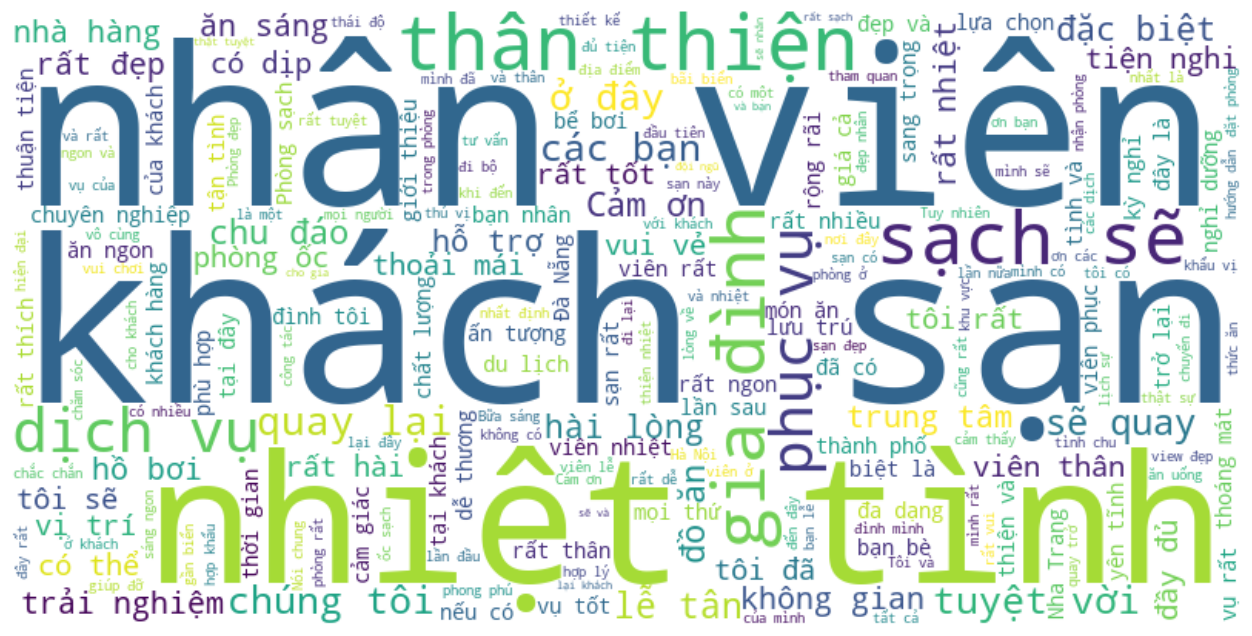

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji


# Generate a word cloud from the message text data
text = " ".join(review for review in vi_df.review)
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Check for the presence of Emojis: Emojis are a fundamental part of tweeting today

In [18]:
import collections

# Function to extract all emojis from a text
def extract_emojis(tweet):
    return ''.join(E for E in tweet if E in emoji.EMOJI_DATA)


# Extract all emojis from the message text data
tweets = " ".join(vi_df['review'].astype(str))
emojis = extract_emojis(tweets)

# Create a list of all the extracted emojis
emojis_list = list(emojis)

# Count the frequency of each emoji in the list
emoji_dict = dict(collections.Counter(emojis_list))

# Sort the dictionary in descending order of frequency
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the dictionary to a pandas DataFrame
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

# Display the top 20 most frequently used emojis
emoji_df.head(20)

,emoji,count
0,❤,2260
1,🥰,922
2,😍,873
3,👍,819
4,😘,400
5,😊,334
6,🏻,307
7,♥,261
8,😁,163
9,☺,151


In [20]:
vi_df.loc[:, 'score'] = vi_df['score'].astype(float)
label_counts = vi_df['score'].value_counts()
label_counts

score
5.0    39665
4.0     4777
3.0     1502
1.0     1492
2.0      666
Name: count, dtype: int64

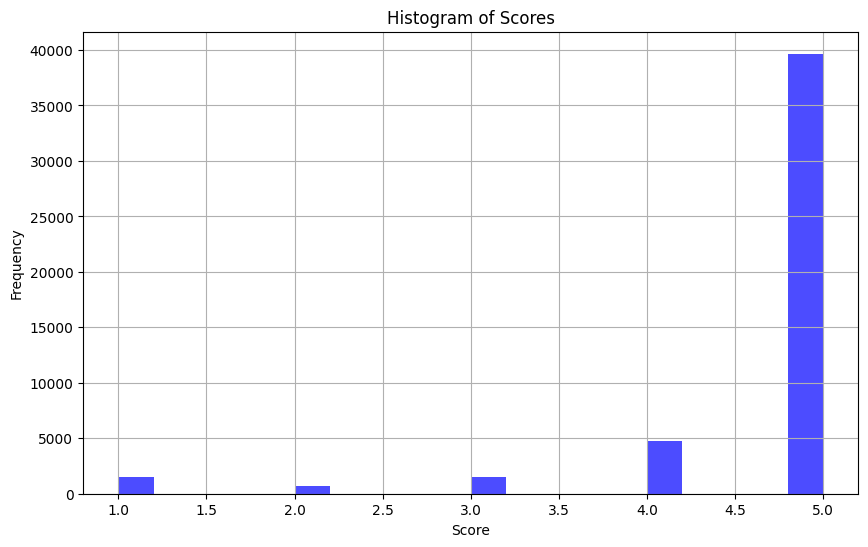

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'score' column to numeric
vi_df.loc[:, 'score'] = pd.to_numeric(vi_df['score'], errors='coerce')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(vi_df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
# Calculate the length of each text in the "safe_text" column
text_lengths = vi_df['review'].apply(len)

# Compute descriptive statistics of text lengths
text_length_stats = text_lengths.describe()

# Print the descriptive statistics
print(text_length_stats)

count    48102.000000
mean       331.709243
std        202.569986
min        103.000000
25%        219.000000
50%        261.000000
75%        361.000000
max       8471.000000
Name: review, dtype: float64


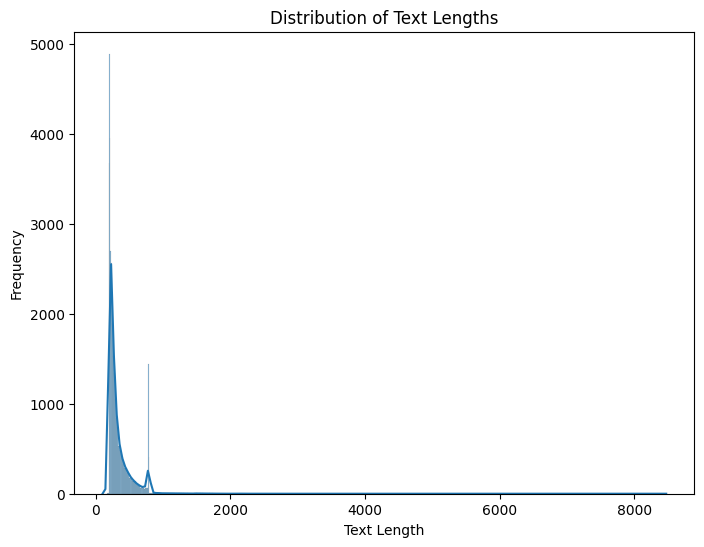

In [27]:
# Create a histogram to visualize the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(text_lengths, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

## Load English content only

In [50]:

en_df = merged_df[merged_df['language'] == 'en']
en_df

,Unnamed: 0,score,title,review,language
0,0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
2,2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
4,4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
5,5,5.0,Wonderful and comfortable place to stay,I was amazed at the hotel. The room was beauti...,en
10,10,5.0,Bussiness,"Location great, rooms were big and spacious. N...",en
...,...,...,...,...,...
784022,784022,5.0,Just what is needed,The dorm room is well organised for a dorm roo...,en
784023,784023,5.0,Really lovely place,We stayed only 1 night in a private. The room ...,en
784024,784024,5.0,Worth for a stay,A good dorm with separated bathroom. Clean and...,en
784025,784025,5.0,Very smart for price,"This place was very cheap, costing me and my g...",en


In [51]:
# Find the index of the row with the longest title
longest_title_index = en_df['title'].str.len().idxmax()

# Find the index of the row with the longest review
longest_review_index = en_df['review'].str.len().idxmax()

# Retrieve the longest title and review
longest_title = en_df.loc[longest_title_index, 'title']
longest_review = en_df.loc[longest_review_index, 'review']

print("Longest title:")
print(longest_title)
print()

print("Longest review:")
print(longest_review)

Longest title:
I feel bad writing this but I think it’s fair people should know about my experience...   + nice staff  + happy hour  + nice roof top bar + free breakfast  + location (away from the busy street)   - there were bugs in the room. I would like to think it’s just mosquitos but it got me bad. I stayed in the female dorm and when I took a nap in the afternoon I felt a couple of bites on my shoulder, I went to the reception to show them the bites asked them if I can transfer dorms as I think there were mosquitoes in the room. The staff transferred me to the mixed dorm. That evening when I was sleeping I felt more bites on my back and neck, I didn’t sleep well and was so annoyed that I almost wanted to leave the hostel in the middle of the night... but, I was able to sleep through it. first thing in the morning I packed my stuff and told them I’m leaving. I had a full day tour to Tam Coc, didn’t quite enjoy it as I was scratching my back and arms the entire time. The tour guide 

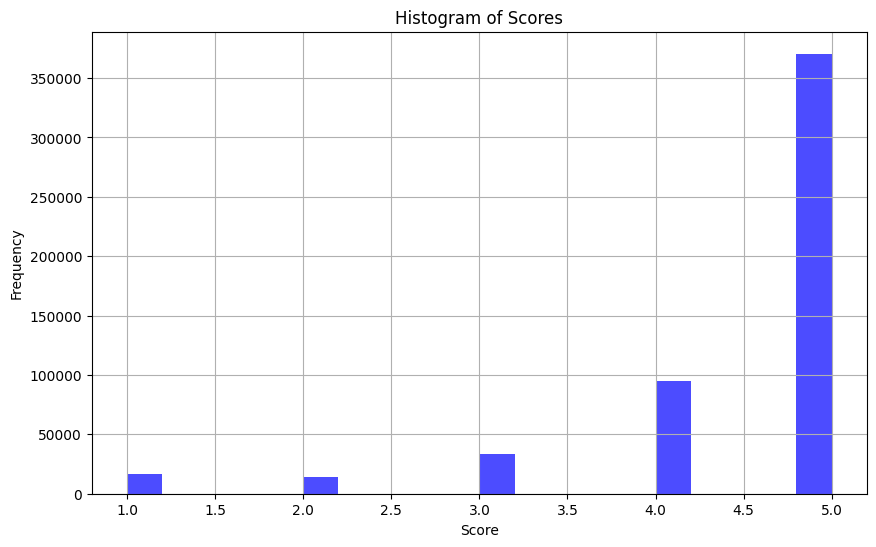

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'score' column to numeric
en_df.loc[:, 'score'] = pd.to_numeric(en_df['score'], errors='coerce')

# Drop NaN values in the 'score' column
en_df = en_df.dropna(subset=['score'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(en_df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [67]:
en_df['score'] = en_df['score'].astype(float)
label_counts = en_df['score'].value_counts()
label_counts

C:\Users\quynd\AppData\Local\Temp\ipykernel_8288\403766096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['score'] = en_df['score'].astype(float)


score
5.0    370507
4.0     95049
3.0     33762
1.0     16434
2.0     14146
Name: count, dtype: int64

In [73]:
sub_en_df = en_df.groupby('score').head(14146)
sub_en_df

,Unnamed: 0,score,title,review,language
0,0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
2,2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
4,4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
5,5,5.0,Wonderful and comfortable place to stay,I was amazed at the hotel. The room was beauti...,en
10,10,5.0,Bussiness,"Location great, rooms were big and spacious. N...",en
...,...,...,...,...,...
783892,783892,2.0,Not a 4* hotel,The hotel is in perfect location. Right opposi...,en
783908,783908,2.0,Potential but...,Good: 1. Across street from beach 2. Room is...,en
783927,783927,2.0,Expected very little - got even less,We were only in Da Nang for a night before fly...,en
783986,783986,2.0,Terrible service,"The accommodation is beautiful, the service ...",en


In [27]:
import pandas as pd

# Assuming 'df' is your DataFrame containing 'title' and 'review' columns
dump_vi_df = vi_df.copy()

# Calculate the length of titles and reviews
dump_vi_df['title_length'] = dump_vi_df['title'].str.len()
dump_vi_df['review_length'] = dump_vi_df['review'].str.len()

# Sort the DataFrame based on title and review length
sorted_titles_df = dump_vi_df.sort_values(by=['review_length'])

# Create a new DataFrame with sorted titles and reviews
shortest_to_longest_df = sorted_titles_df[['title', 'review']]

# Display the DataFrame
shortest_to_longest_df

,title,review
278864,nơi đáng đến để thư giản,"không gian thoáng mát, đáng đến, phòng đẹp, vư..."
523403,Shining spa,Mình đến đây thấy nhân viên khá nhẹ nhàng. C.t...
478758,Good,"Homestay sạch sẽ, giá rẻ, dịch vụ xe tốt. Chủ ..."
367665,Trải nghiệm tại Ma Rừng Lữ Quán Đà Lạt,"Ma rừng lữ quán Đà Lạt đẹp một cách ma mị, ngh..."
338439,Hài lòng,"Chỗ ở sạch,thoáng, tiên nghi, ngay trug tâm, d..."
...,...,...
463561,Khách sạn Hải Anh tự ý hủy phòng của khách và ...,Chuyến du lịch của tôi theo kế hoạch sẽ kéo dà...
321397,MỘT DỊCH VỤ VÔ CÙNG TỒI TỆ TẠI IBIS STYLES NHA...,Tôi có một booking tại khách sạn Ibis Styles N...
231953,Sự nuối tiếc cho khu nghỉ. Cơn ác mộng 3 đêm 4...,Tôi viết bài này bằng tiếng Việt vì phần lớn n...
557540,tiền của chúng tôi dùng để làm gì? để các bạn ...,Chúng tôi ghé thăm khu nghỉ dưỡng vào 1 ngày đ...


## Create more data for fine-tuning Vietnamese

In [55]:
!git clone https://huggingface.co/VietAI/envit5-translation

Cloning into 'envit5-translation'...
Filtering content:  50% (2/4)
Filtering content:  50% (2/4), 1.02 GiB | 4.03 MiB/s
Filtering content:  75% (3/4), 1.02 GiB | 4.03 MiB/s
Filtering content:  75% (3/4), 2.05 GiB | 5.11 MiB/s
Filtering content: 100% (4/4), 2.05 GiB | 5.11 MiB/s
Filtering content: 100% (4/4), 3.07 GiB | 7.52 MiB/s
Filtering content: 100% (4/4), 3.07 GiB | 7.43 MiB/s, done.


In [61]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_ckpt = r"D:\Code\AISIA\envit5-translation"
device = 0 if torch.cuda.is_available() else -1
print("device:", device)

tokenizer = AutoTokenizer.from_pretrained(model_ckpt,  local_files_only=True)

device: 0


In [62]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt, local_files_only=True)

In [93]:
filtered_rows = []

for index, row in en_df.iterrows():
    english_tokens = tokenizer.tokenize(row['review'])
    english_token_count = len(english_tokens)
    if english_token_count <= 256:
        filtered_rows.append(row)

# Create a new DataFrame with filtered rows
filtered_en_df = pd.DataFrame(filtered_rows)

In [97]:
filtered_en_df

,Unnamed: 0,score,title,review,language
0,0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
2,2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
4,4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
5,5,5.0,Wonderful and comfortable place to stay,I was amazed at the hotel. The room was beauti...,en
10,10,5.0,Bussiness,"Location great, rooms were big and spacious. N...",en
...,...,...,...,...,...
784022,784022,5.0,Just what is needed,The dorm room is well organised for a dorm roo...,en
784023,784023,5.0,Really lovely place,We stayed only 1 night in a private. The room ...,en
784024,784024,5.0,Worth for a stay,A good dorm with separated bathroom. Clean and...,en
784025,784025,5.0,Very smart for price,"This place was very cheap, costing me and my g...",en


In [98]:
label_counts = filtered_en_df['score'].value_counts()
label_counts

score
5.0    369062
4.0     94361
3.0     33175
1.0     15351
2.0     13633
Name: count, dtype: int64

In [100]:
filtered_df = filtered_en_df[filtered_en_df['score'] != 5.0]
filtered_df = filtered_df.groupby("score").head(12000)
filtered_df

,Unnamed: 0,score,title,review,language
12,12,2.0,Not as described online,We stayed here for two nights. The description...,en
23,23,3.0,"Cool hostel, far from city",This hostel is super cool and the staff are in...,en
25,25,1.0,Management should be ashamed of themselves.,There is actually a lot of positive things I c...,en
26,26,1.0,Very disappointing.,I came in with a friend of mine after a night ...,en
28,28,2.0,It a nice place with rude people,It is a nice place. It’s very chilled and drin...,en
...,...,...,...,...,...
697061,697061,2.0,Wouldn't stay again,We stayed here for the last night before we le...,en
697144,697144,2.0,Very hard beds,"Good location, large room but cannot sleep. H...",en
697167,697167,2.0,Unstable lighting,My room's lighting was unstable and keep flash...,en
697175,697175,2.0,Good location but in need of an upgrade,The only merit of this hotel is its location w...,en


In [101]:
filtered_df['review'] = filtered_df['review'].apply(lambda x: 'en: ' + x)
filtered_df

,Unnamed: 0,score,title,review,language
12,12,2.0,Not as described online,en: We stayed here for two nights. The descrip...,en
23,23,3.0,"Cool hostel, far from city",en: This hostel is super cool and the staff ar...,en
25,25,1.0,Management should be ashamed of themselves.,en: There is actually a lot of positive things...,en
26,26,1.0,Very disappointing.,en: I came in with a friend of mine after a ni...,en
28,28,2.0,It a nice place with rude people,en: It is a nice place. It’s very chilled and ...,en
...,...,...,...,...,...
697061,697061,2.0,Wouldn't stay again,en: We stayed here for the last night before w...,en
697144,697144,2.0,Very hard beds,"en: Good location, large room but cannot sleep...",en
697167,697167,2.0,Unstable lighting,en: My room's lighting was unstable and keep f...,en
697175,697175,2.0,Good location but in need of an upgrade,en: The only merit of this hotel is its locati...,en


In [103]:
import tqdm

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)
model.to(device)

# List to store generated text
generated_text = []

# Iterate over each review with tqdm for progress bar
for review in tqdm.tqdm(filtered_df['review']):  # Use tqdm here
    # Tokenize the review and generate text
    input_ids = tokenizer(
        review, 
        return_tensors="pt", 
        padding=True, truncation=True
    ).input_ids.to(device)

    outputs = model.generate(input_ids, max_length=256)

    # Decode generated text and add it to the list
    generated_text.append(tokenizer.decode(outputs[0], skip_special_tokens=True))

# Add generated text back to the DataFrame
filtered_df['generated_text'] = generated_text

filtered_df

Device: cuda


  3%|▎         | 1534/48000 [2:45:14<83:25:25,  6.46s/it] 


KeyboardInterrupt: 